# Supervised Learning Project
## Steven Storm
## Finding Donors

## Introduction

This project will employ supervised algorithms to model individuals income using census data. The goal is to predict if a person will make $50000 or more. Understanding a persons income is useful when attempting to identify potential donors.


## Exploring the Data

The code below will load all the required python libraries and data. 
The income loaded from the dataset will be the primary target for this project. All other items are general information gathered by the census.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
sns.set(style="whitegrid")

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [2]:
# Investigation of outcome feature
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [3]:
# Investigation of outcome feature
data.groupby('income').count()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
income,,,,,,,,,,,,,
<=50K,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014,34014
>50K,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208,11208


In [4]:
# Investigation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [5]:
# Checking for missing values
data.isnull().values.any()

False

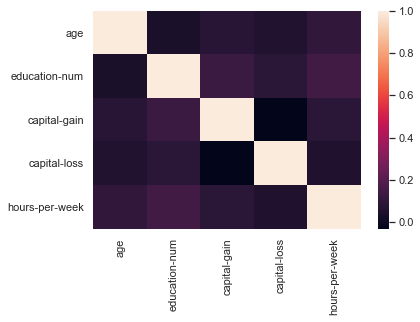

In [6]:
# Investigating the level of correlation between numerical variables using Seaborn's heatmap
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values);

## Implementation: Data Exploration

We will determine the total number of records, the counts of both those making more and less than $50,000 a year and the total percentage of the records making more than desired amount. 


In [7]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data['income'].value_counts()[1]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data['income'].value_counts()[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = round(n_greater_50k / n_records * 100,1)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.8%


## Feature set Exploration

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 1
10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Preparing the Data

No missing or invalid entries were located in the data set. Some data does require adjusting.

### Data Transformation

Capital-gain and Capital-loss values are plotted below. Due to the values they will need to be adjusted to prevent the skewing of the model when ran. 

C:\Users\trexm\Supervised Learning\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


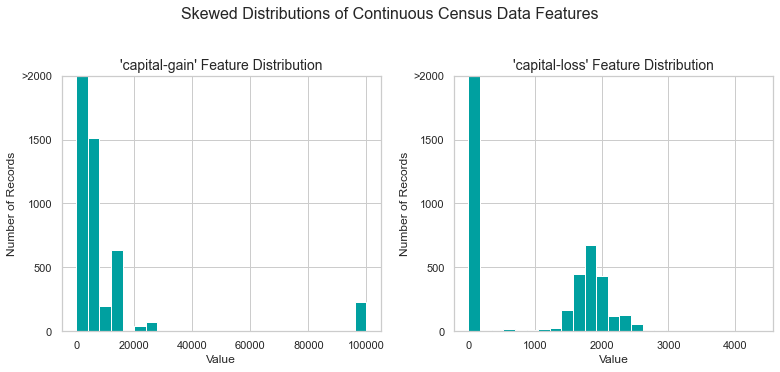

In [8]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as 'capital-gain' and 'capital-loss', a logarithmic transformation is done to prevent very large and small values from having a negative impact on the learning algotrithm

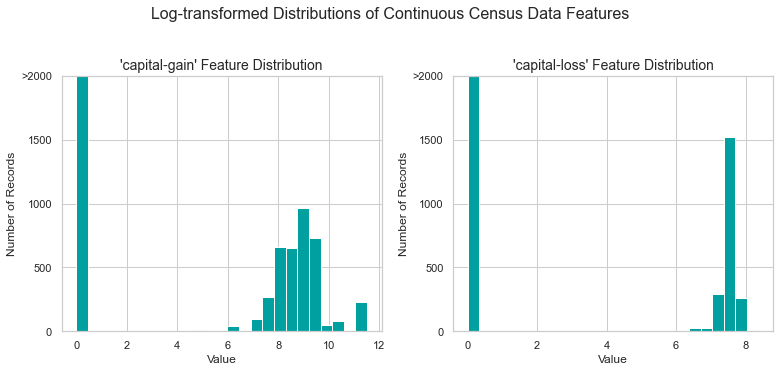

In [9]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

In [10]:
#Investigation of some columns with impact of log transformations
features_log_transformed[features_log_transformed['capital-gain'] > 0][:5]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,9.552866,0.0,50.0,United-States
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,8.552367,0.0,40.0,United-States
55,30,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,8.519989,0.0,40.0,United-States
56,30,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7.786552,0.0,40.0,United-States


In [11]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


## Data Processing

Not all features in the data set are numeric. Learning algorithms generally look for numeric fields which require fields to be converting to int type.  Hot encoding will be used to convert these variables. 

In [12]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(data=features_log_minmax_transform, columns=['workclass','education_level',\
                                'marital-status','occupation','relationship','race','sex','native-country'])

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K':0,'>50K':1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

## Shuffle and Split

Data will now be split in to the training and testing sets with 80% of the data being used for training

In [13]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


## Model Performance

Four different algorithims be tested to determine which will be the most effective with one of them being used as the naive predictor.

### Question 1 - Naive Predictor Performace

In [14]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
accuracy = np.sum(income) / income.count() 
recall = np.sum(income) / np.sum(income)
precision = np.sum(income) / (np.sum(income)+(income.count()-np.sum(income)))

#accuracy = n_greater_50k / n_records
#recall = n_greater_50k / n_greater_50k
#precision = n_greater_50k / (n_greater_50k + n_at_most_50k)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = ((1+(beta**2)) * precision * recall) / (((beta**2)*precision)+recall)

# Print the results
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


## Question 2 - Model Application

### AdaBoost

This model is highly accurate classifier created by combining multiple weak and inaccurate classifiers. It requires little to no tuning of hyperparameters. It is sometimes refered to as the "best our of the box classifier" and is used but yahoo search and Call of Duty.

The strength of the adaboost model is that is will give good results without paramater adjustments as stated above. In cases where adjustments are needed they remain minor and easy to complete. It works by running multiple models in order. Once the first model has completed the second model will attempt to correct the issues of the first one. 

The weakness of AdaBoost is that it is sensitive to outliers and noise in the data. Due to these facts the data set must be cleaned prior to use. 

### Gradient Boosting

This model is a gradient decent algorithm used with deccision trees and is part of the group classifiers like the AdaBoost. You will generally find this used in text classification and robotics processes due to it working well with predicting data from high dimensional distributions.

Its strengths is that is uses multiple classess of weak classifiers to form a decision tree one level at a time. Each new tree is used to improve the previous tree resulting in shallower, better performing classifiers. 

It weakness is that it is prone to overfitting. Also due to the sequenctial nature of how it works it can take longer to train than others.

### Support Vector Machines (SVM)

SVMs are used in the real world to help predict diseases, identify breast cancer and detect proteins. They are also used in handwriting  recognition and facial recgonition. 

Its strength is that when you are dealing with unknown data sets it is exceptional at finding the best boundries and then to classify that data. It is also exceptional at working with unsctructed data such as images. 

Its weakness is that you must choose a kernel that functions will with the data. It also has long train times which means with large sets it may become inefficient. Additionally the final model is not easily to inturprate which makes calibration impracticle. 



## Implementation



In [15]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score 

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

AdaBoostClassifier trained on 723 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 723 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
SVC trained on 723 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.


C:\Users\trexm\Supervised Learning\visuals.py:121: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


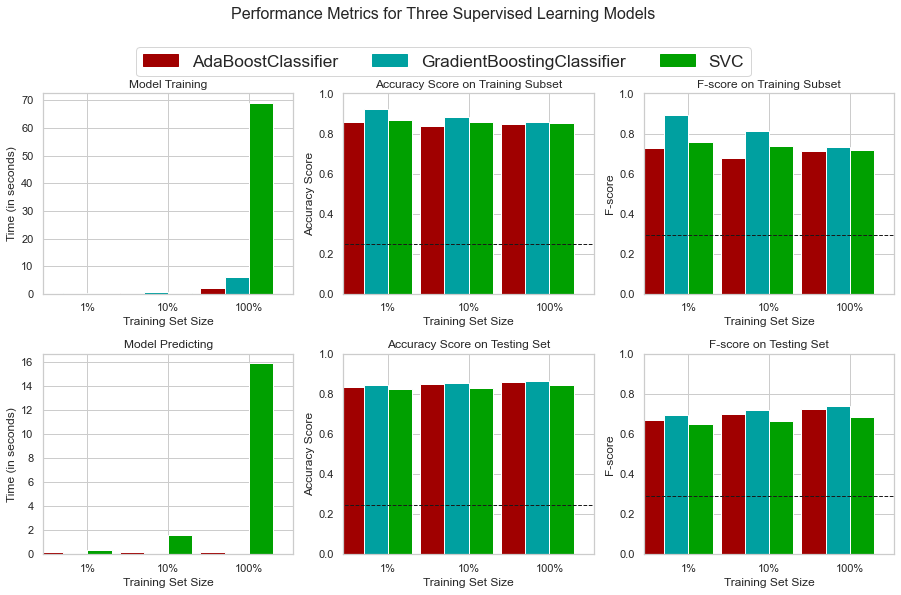

In [16]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier 

# TODO: Initialize the three models
clf_A = AdaBoostClassifier()
clf_B = GradientBoostingClassifier()
clf_C = SVC()


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.02) # Increased to 2% to avoid SVC division by 0 message

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

        
vs.evaluate(results, accuracy, fscore)       

## Question 3 - Choosing the Best Model

The best performing was the Gradient Boosting Algorithm which returned an accuracy of above 80% and a f score of near 75%.This shows that it our performed the other algorithms in every aspect.

The gradient boost did require a longer training time compared to the ADA Booster but was significantly less than the SVC method.

Gradient Boosting will be the best option due to the accuracy of the algorithm and in terms of time. 

## Question 4 - Describing the Model in Layman's Terms

The Gradient Boosting Classifier is from the ensemble method of models. This set of models uses a multitude of diffrent learning algorithms to produce a better prediction than the individual algorithms would. Each algorithm in the system makes its own prediction that amounts to what is basicily a real good guess which is why they regularly refered to as weak learners. 

The system works by taking the first learning making the learner conform to the data while maximizing the accuracy and keeping the errors to a minimum. The best way to picture this is that the first learner plots all the data to a chart and then the leaner splits the chart to find those making greater than $50,000 by using a straight line. Now since this method can not capture all the variable using that approach multiple learners will be required.

The second learner will need to fix the errors that fall outside the plane created by the first learned. It will perform the processes of the first learner and come up with a refined anwser. This process will continue with additional learners until they have all ran. Once that is complete the learners outcomes will all be compiled and a "consensus" will be reached using the planes created by the learners.

In [17]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'learning_rate' : [0.1,0.15,0.2],
              'n_estimators' : [200,350,500],
              'max_depth' : [2,3,4],
              #'min_samples_split' : [2,4,6]
             }

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

start = time()

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)

#grid_obj = RandomizedSearchCV(clf,param_distributions=parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)


# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

end = time()



# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

print("-------\n",(end - start)/60,"minutes.")

print("-------\n", best_clf)

Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8705
Final F-score on the testing data: 0.7527
-------
 36.221501060326894 minutes.
-------
 GradientBoostingClassifier(n_estimators=350, random_state=42)


## Question 5 - Final Model Evaluation

After optimizing the gradient boosting model using grid search on the number of boosting stages, max depth of nodes and learning rate accuracy was increased to 87% and f score to 75%.

## Question 6 - Feature Relevance Observation

The major factors that I would expect to have an impact on a persons income are:

1:Education
2:Capital Gains
3:Occupation
4:Age
5:Hours worked

Education was picked as my top option for the reason that people with higher levels of education tend to be on the higher earning side. 

Captial Gains came in second as those who have significant income are more likely to have access to the means to obtain captial gains from investments.

Occupation is 3rd as it is not necessarily tied to education level. There are a multitude of profession that have earning potentials well above $50,000.

Age is 4th based on the fact that as people age their income tends to increase

Lastly hours work does have due to the fact that the more hours worked in a pay per hour employment leads to increased income.

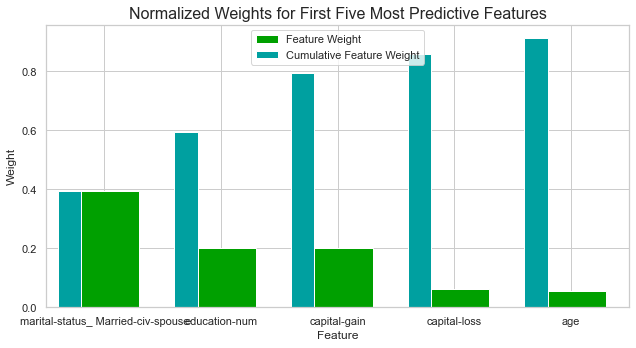

In [18]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(random_state=42).fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

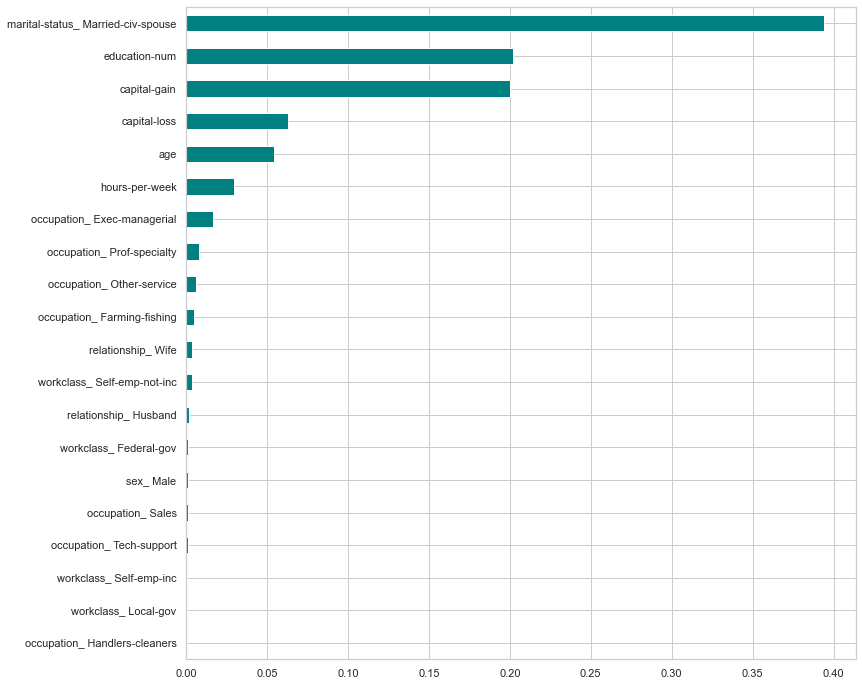

In [19]:
# look at top "n" feature importances to get a better overall understanding of feature impact levels.
n = 20
pd.Series(importances, index=X_train.columns).sort_values()[-n:].plot(kind='barh',figsize=(12,12),color='teal');

## Question 7 - Extracting Feature Importance

For the top 5 predictors I got 2 out of the 5 correct. Captial gains proved to be the highest proved to be the biggest contributor closely followed by Captial losses. Marital status came in third which make since as those that are married tend to have increased income due to both partners contributing. Occupation and hours worked had less of an impact but but still remained higher on the list. 

In [20]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8705
F-score on testing data: 0.7527

Final Model trained on reduced data
------
Accuracy on testing data: 0.8587
F-score on testing data: 0.7246


In [21]:
#Including the hours per week worked feature, so there are 6 features considered
X_train_6_features = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:6]]]
X_test_6_features = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:6]]]

clf = (clone(best_clf)).fit(X_train_6_features, y_train)

reduced_predictions_2 = clf.predict(X_test_6_features)

print("\nFinal Model trained on reduced data with 6 features\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions_2)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions_2, beta = 0.5)))


Final Model trained on reduced data with 6 features
------
Accuracy on testing data: 0.8608
F-score on testing data: 0.7300


## Question 8 - Effects of Feature Selection

If we use the top 5 features we end up with decreased performance. The full final model has an accuracy of 87% while the model using the top 6 shows an accuracy of 86% which is a 1% decrease. While 1% may be negligible to the charity it does show that the other features do have an impact on the accuracy. The f score drops from 75% to 73% when we use a smaller feature set. For the reduced training set it would be dependent on the customers specifications. If the reduced accuracy was within acceptable limits a smaller training set could be used to increase time efficiency.